In [1]:
from keras import layers
from keras import models
#from keras import optimizers
from keras.models import load_model 
from keras.preprocessing import image 
import numpy as np

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [2]:
img_path='C:/AppData/kagglecatsanddogs_3367a/cats_dogs_small/test/cats/191.jpg'
img=image.load_img(img_path, target_size=(150, 150)) 
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor, axis=0) 
img_tensor/=255.
print(img_tensor.shape)

(1, 150, 150, 3)


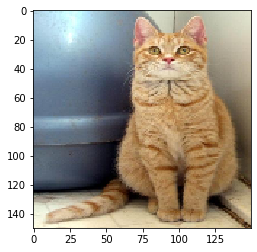

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [4]:
layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)    #8个激活模型

activations = activation_model.predict(img_tensor)    #8个层输出的特征图
first_layer_activation = activations[0]
print(first_layer_activation.shape) 

(1, 148, 148, 32)


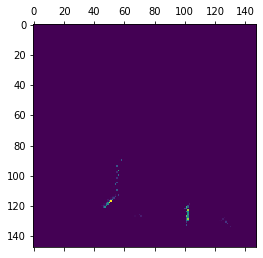

In [5]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

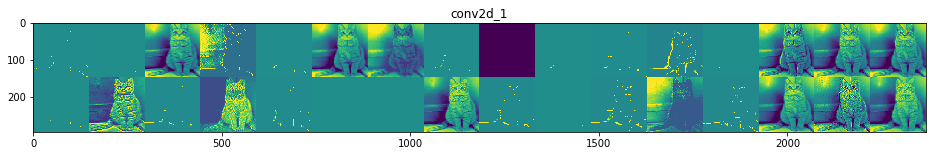

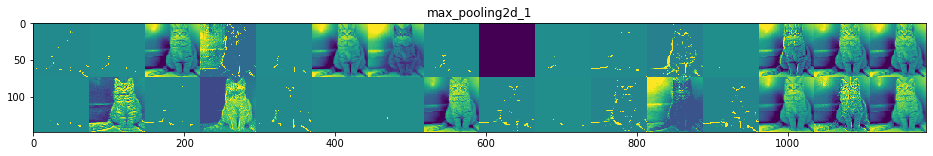

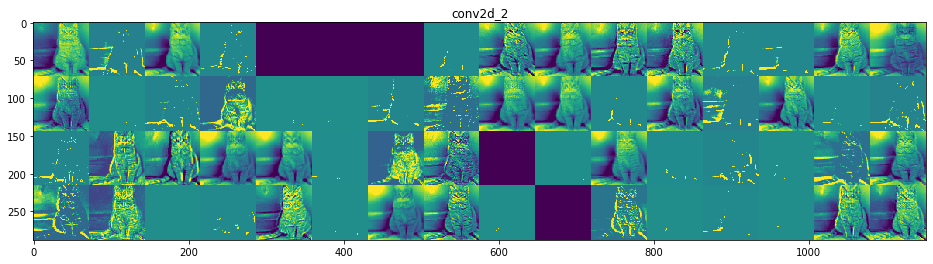

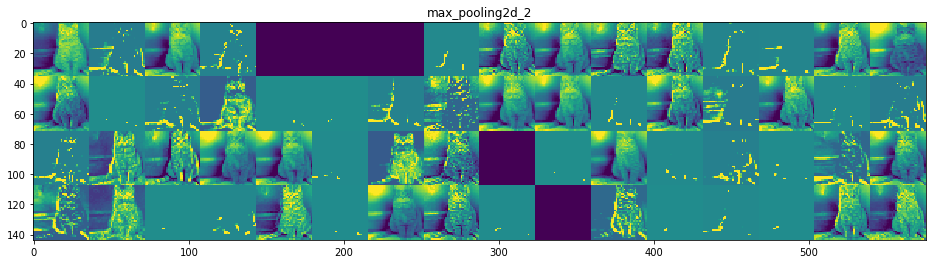

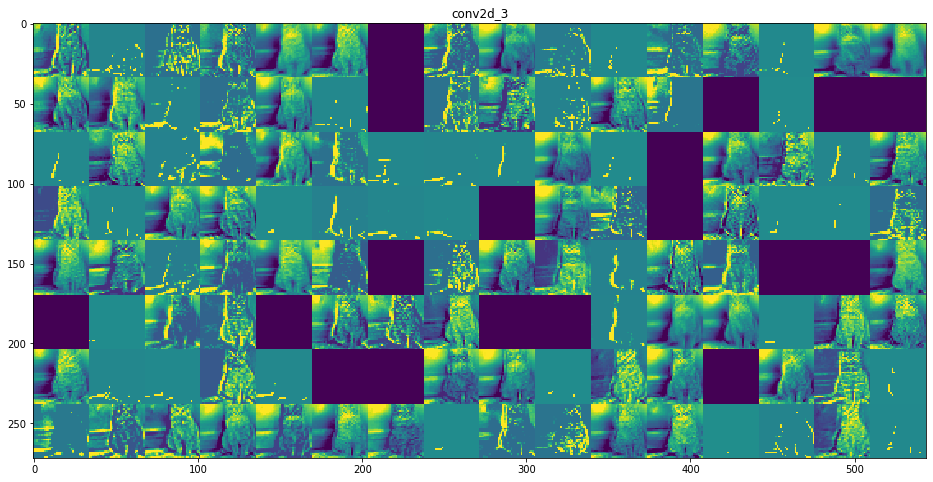

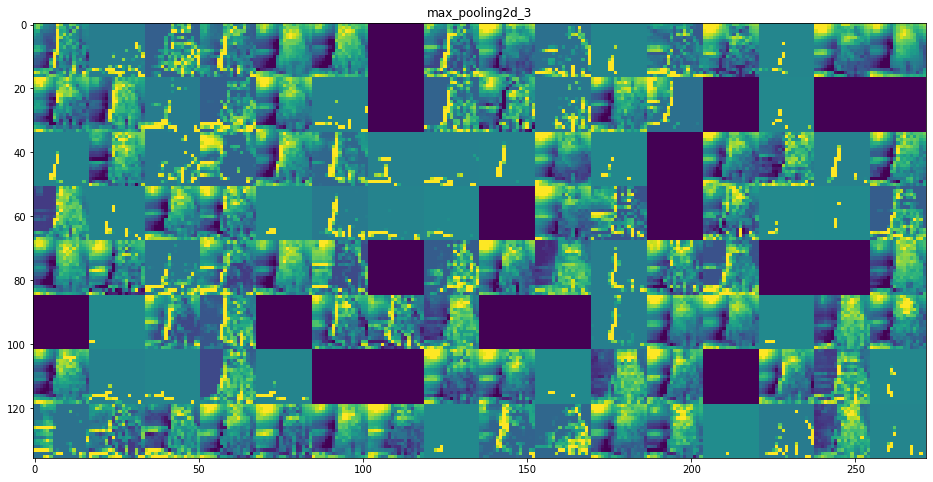

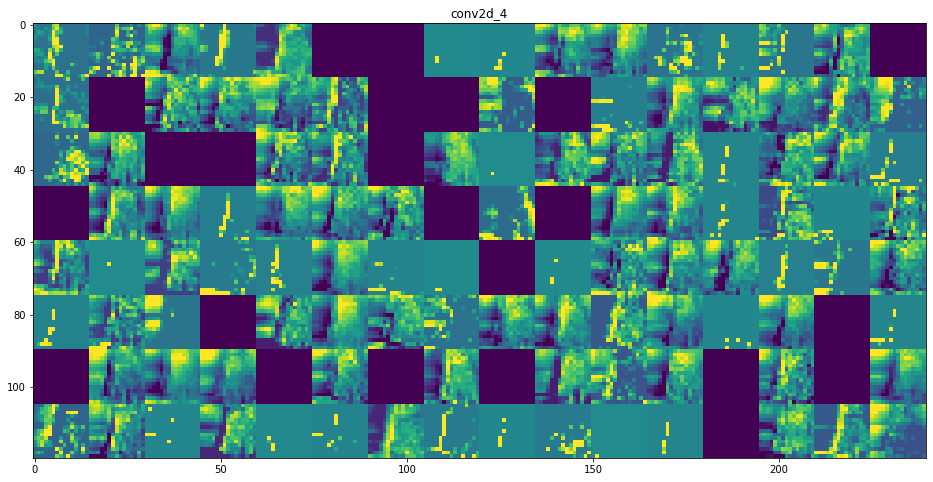

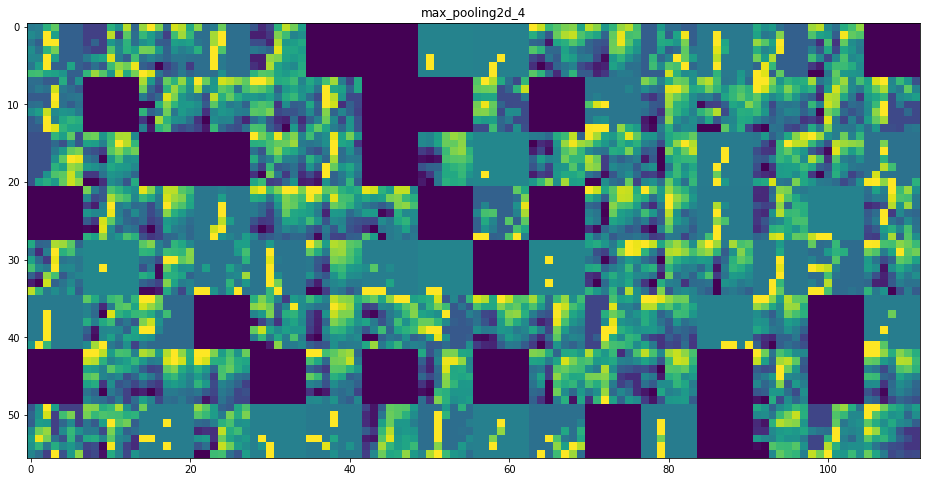

In [6]:
layer_names = []   #读取各个输出节点对应层的名字
for layer in model.layers[:8]:     
    layer_names.append(layer.name) 
    
np.seterr(divide='ignore',invalid='ignore') #除数为0不提示

images_per_row = 16    #每行输出特征图数量为16
 
for layer_name, layer_activation in zip(layer_names, activations):       #每层名称+特征图输出
    n_features = layer_activation.shape[-1]         #特征图的特征个数,如第一层中对应的32
 
    size = layer_activation.shape[1]   
 
    n_cols = n_features // images_per_row       
    display_grid = np.zeros((size * n_cols, images_per_row * size)) 
 
    for col in range(n_cols):           
        for row in range(images_per_row):             
            channel_image = layer_activation[0,                                             
                                             :, :,                                              
                                             col * images_per_row + row]             
            channel_image -= channel_image.mean()               
            channel_image /= channel_image.std()             
            channel_image *= 64             
            channel_image += 128             
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')             
            display_grid[col * size : (col + 1) * size,                            
                         row * size : (row + 1) * size] = channel_image
    scale=1./size
    plt.figure(figsize=(scale * display_grid.shape[1],                         
                                scale * display_grid.shape[0]))     
    plt.title(layer_name)     
    plt.grid(False)     
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
